- We will use MNIST dataset which we can import from keras module. But for that we need to install: `pip install keras` and `pip install tensorflow` as keras uses tenorflow to import datasets
- But for now I've this dataset present inside Dataset folder.

In [1]:
# from keras.datasets import mnist

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("../Datasets/MNIST-2/mnist_train.csv")
data.head()  # show first 5 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.shape

(42000, 785)

In [19]:
X_train = data.iloc[:,1:]  # from 2nd column onwards
y_train = data.iloc[:,0]  # 1st column

X_train = X_train.values ## convert to numpy arrays
y_train = y_train.values

In [20]:
X_train.shape, y_train.shape

((42000, 784), (42000,))

### We will extract 2features out of these 784 features

In [21]:
plt.style.use("seaborn")

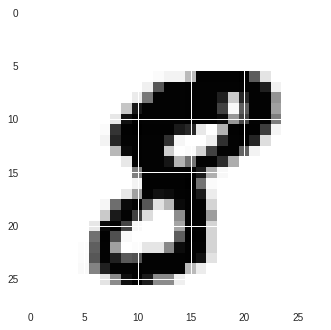

8


In [26]:
plt.imshow(X_train[10].reshape((28,-1)))  # reshape to 28x28 \
plt.show()
print(y_train[10])  # print 112th element

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

- StandardScalar() class is used to normalize the data by using the following function:

In [28]:
X = sc.fit_transform(X_train)
X.shape

(42000, 784)

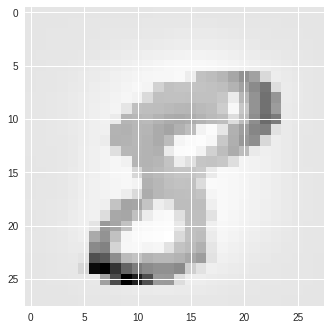

8


In [32]:
plt.imshow(X[10].reshape((28,-1)))  # reshape to 28x28 \
plt.show()
print(y_train[10])  # print 112th element

- We can see, it has transformed as we have normalized our data.

## sklearn PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)  # n_components means how much new components we want

In [35]:
Z_pca = pca.fit_transform(X)
Z_pca.shape

(42000, 2)

In [36]:
Z_pca

array([[-5.14045114, -5.2264033 ],
       [19.29232305,  6.03294354],
       [-7.6445164 , -1.70594757],
       ...,
       [ 0.49536811,  7.07614795],
       [ 2.30725892, -4.34451057],
       [-4.80765601,  1.5592667 ]])

In [38]:
pca.explained_variance_

array([40.69647875, 29.11146565])

In [39]:
100 - np.sum(pca.explained_variance_)

30.19205560928833

## Custom PCA
- Let us build PCA algorithm by ourself

In [40]:
import numpy as np

- <font size="5">**Step1**</font> - Data-prepocessing: (Standardize data) => This we have already done above.
- <font size="5">**Step2**</font> - Compute Covariance Matrix
- To calculate covariance matrix, we can use vectorization instead of for loops to make our algo faster as:

 Cov_mat = $X^T.X$  which is (n,m)\*(m,n) = (n,n)

In [41]:
covar = np.dot(X.T, X)
covar.shape

(784, 784)

<font size="5">**Step3**</font> - Compute eigen vectors using SVD

In [42]:
from numpy.linalg import svd

In [43]:
svd?

In [44]:
U, S, V = svd(covar)
U.shape  # it is of (nxn) shape

(784, 784)

In [45]:
# pick 2 eigen vectors from all the eigen vectors 
Ured = U[:, :2]
Ured.shape

(784, 2)

In [46]:
z = np.dot(X, Ured)
z.shape  # (n,k) shape

(42000, 2)

In [51]:
for i in range(10):  # check for first 10 values
    print(z[i], Z_pca[i])  # z-customized axes , Z-pca-sklear predicted axes

[-5.14047772 -5.2264454 ] [-5.14045114 -5.2264033 ]
[19.29233234  6.03299601] [19.29232305  6.03294354]
[-7.64450341 -1.70581328] [-7.6445164  -1.70594757]
[-0.47420666  5.83613925] [-0.47420804  5.83618656]
[26.55957444  6.02481844] [26.55956994  6.02479964]
[ 1.26919723 -0.71378824] [ 1.26918264 -0.71377285]
[-6.13961317  6.02841593] [-6.13962273  6.02830987]
[0.14779207 4.23857083] [0.1477825  4.23867191]
[-0.59813814 -1.67183704] [-0.59813871 -1.67198942]
[ 2.94068355 -2.18260069] [ 2.94065268 -2.18247595]


## Visualize Dataset

In [52]:
import pandas as pd

In [53]:
new_dataset = np.hstack((z, y_train.reshape((-1,1)))) # combine y as last column
dataframe = pd.DataFrame(new_dataset, columns=["PC1", "PC2", "label"])
dataframe.head()

,PC1,PC2,label
0,-5.140478,-5.226445,1.0
1,19.292332,6.032996,0.0
2,-7.644503,-1.705813,1.0
3,-0.474207,5.836139,4.0
4,26.559574,6.024818,0.0


<Figure size 720x720 with 0 Axes>

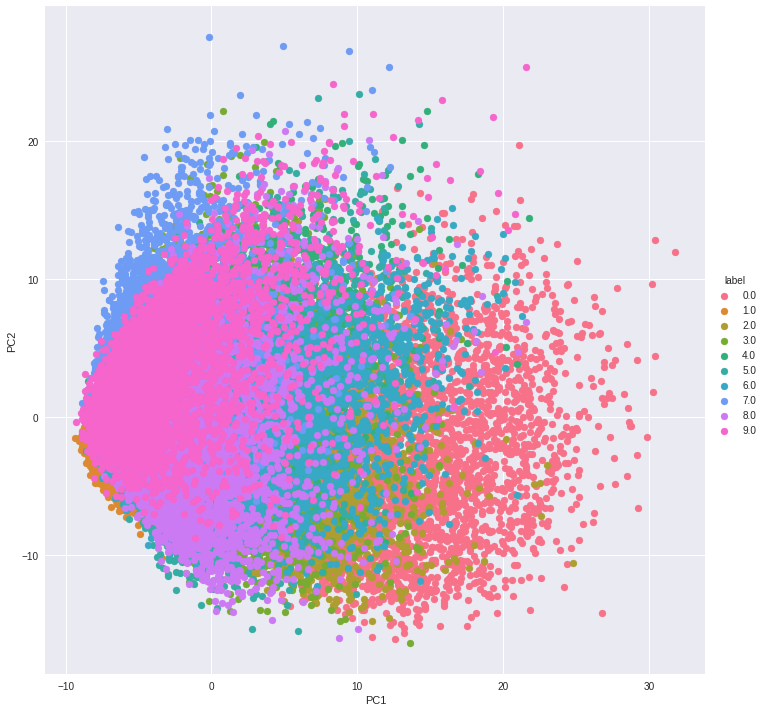

In [54]:
import seaborn as sns
plt.figure(figsize=(10,10))
fg = sns.FacetGrid(dataframe, hue="label", height=10)  # height defines size of the graph
fg.map(plt.scatter, "PC1", "PC2")  # PC1- x-axis, PC2- y-axis
fg.add_legend()
plt.show()

- **This is our MNIST data in 2-D**. Here orange color represents 0.0, brown-1.0 and so on.. which is given as labels.

## PCA with 784 -D

In [ ]:
pca = PCA(n_components=784)
z_pca = pca.fit_transform(X)
print(z_pca)

In [ ]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)
print(cum_var_explained)

In [ ]:
plt.figure(figsize(6,6))
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained variance")
plt.show()

- Now we can pick no of components until where we have 90% or 95% of variance retained.